<a href="https://colab.research.google.com/github/stedua22/6372-Project-2/blob/main/Copy_of_ICA2_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**NAME:**
(enter your name here)


# In Class Assignment 2

### Loading the Classification Data
Please run the following code to read in the "digits" dataset from sklearn's data loading module. This is identical to the first in class assignment for loading the data into matrices. `ds.data` is a matrix of feature values and `ds.target` is a column vector of the class output (in our case, the hand written digit we want to classify). Each class is a number (0 through 9) that we want to classify as one of ten hand written digits.



In [2]:
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

ds = load_digits()

# this holds the continuous feature data
print('features shape:', ds.data.shape) # there are 1797 instances and 64 features per instance
print('target shape:', ds.target.shape )
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (1797, 64)
target shape: (1797,)
range of target: 0 9


### Using Decision Trees
In the videos, we talked about the splitting conditions for different attributes. Specifically, we discussed the number of ways in which it is possible to split a node, depending on the attribute types. To understand the possible splits, we need to understand the attributes. For the question below, you might find the description in the `ds['DESCR']` field to be useful. You can see the field using `print(ds['DESCR'])`

**Question 1:** For the digits dataset, what are the type(s) of the attributes? How many attributes are there? What do they represent?


**Answer:**

The attributes are numerical, specifically integer values ranging from 0 to 9. There are 64 attribute. The attributes represent pixel intensity values of 8x8 images of handwritten digits. Each attribute corresponds to a specific pixel in the 8x8 grid.

In [3]:
## Enter any code here
print(ds['DESCR'])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Text(0.5, 0.98, 'Label is 6')

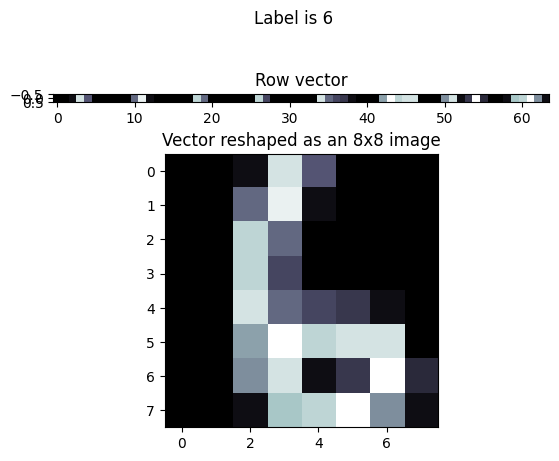

In [4]:
#get the vector data from a random position
idx = np.random.randint(0,len(ds.target))
raw_row = ds.data[idx] # as a vector
img = ds.data[idx].reshape((8,8)) #reshaped to be an image

#custom plotting tools
gs = gridspec.GridSpec(4,2)

plt.subplot(gs[0,:]) #show vector
plt.imshow(np.matrix(raw_row), cmap=plt.cm.bone, interpolation='nearest')
plt.title('Row vector')

plt.subplot(gs[1:,:]) #show image
plt.imshow(img, cmap=plt.cm.bone, interpolation='nearest')
plt.title('Vector reshaped as an 8x8 image')

plt.suptitle('Label is %d'%(ds.target[idx]))

### Using the gini coefficient
We talked about the gini index in the videos.  The Gini coefficient for a **given split** is given by:
$$Gini=\sum_{t=1}^T \frac{n_t}{N}gini(t)$$
where $T$ is the total number of splits (2 for binary attributes), $n_t$ is the number of instances in node $t$ after splitting, and $N$ is the total number of instances in the parent node. $gini(t)$ is the **gini index for each individual node that is created by the split** and is given by:
$$gini(t)=1-\sum_{j=0}^{C-1} p(j|t)^2$$
where $C$ is the total number of possible classes and $p(j|t)$ is the probability of class $j$ in node $t$ (i.e., $n_j==$ the count of instances belonging to class $j$ in node $t$, normalized by the total number of instances in node $t$).
$$ p(j|t) = \frac{n_j}{n_t}$$

For the given dataset, $gini(t)$ has been programmed for you in the function `gini_index`.

* `def gini_index(classes_in_split):`
 * To use the function, pass in a `numpy` array of the class labels for a node as (i.e., pass in the rows from `ds.target` that make up a node in the tree) and the gini will be returned for that node.


In [5]:
# compute the gini of several examples for the starting dataset
# This function "gini_index" is written for you. Once you run this block, you
#   will have access to the function for the notebook. You do not need to know
#   how this function works--only what it returns
# This function returns the gini index for an array of classes in a node.
def gini_index(classes_in_split):
    # pay no attention to this code in the function-- it just computes the gini for a given split
    classes_in_split = np.reshape(classes_in_split,(len(classes_in_split),-1))
    unique_classes = np.unique(classes_in_split)
    gini = 1
    for c in unique_classes:
        gini -= (np.sum(classes_in_split==c) / float(len(classes_in_split)))**2

    return gini

In the example below, the function is used calculate the gini for splitting the dataset on feature 28, with value 2.5. In this example, we need to create two separate tree nodes: the first node has all the `ds.target` labels when feature 28 is greater than 2.5, the second node has all the rows from `ds.target` where feature 28 is less than 2.5. The steps are outlined below. **Read this carefully to understand what the code does below in the block following this.**
- Feature 28 is saved into a separate variable `feature28 = ds.data[:,28]`
- First all the target classes for the first node are calculated using `numpy` indexing `ds.target[feature28>2.5]`
 - Note: this grabs all the rows in `ds.target` (the classes) which have feature 28 greater than 2.5 (similar to indexing in pandas)
- Second, those classes are passed into the function to get the gini for the right node in this split (i.e., feature 28 being greater than the threshold 2.5).
 - `gini_r = gini_index(ds.target[feature28>2.5])`
- Third, the gini is calculated for the left node in the tree. This grabs only the rows in `ds.target` where feature 28 is less than 2.5.
     - `gini_l = gini_index(ds.target[feature28<=2.5])`
- Combining the gini indices is left as an exercise in the next section

In [6]:
#==========================Use the gini_index Example===============
# get the value for this feature as a column vector
# (this is like grabbing one column of the record table)
feature28 = ds.data[:,28]

# if we split on the value of 2.5, then this is the gini for each resulting node:
gini_r = gini_index(ds.target[feature28>2.5]) # just like in pandas, we are sending in the rows where feature28>2.5
gini_l = gini_index(ds.target[feature28<=2.5]) # and sending the rows where feature28<=2.5

# compute gini example. This splits on attribute '28' with a value of 2.5
print('gini for right node of split:', gini_r)
print('gini for left node of split:', gini_l)

gini for right node of split: 0.8845857867667073
gini for left node of split: 0.7115407566535388


Now, using the above values `gini_r` and `gini_l`. Calculate the combined Gini for the entire split. You will need to write the weighted summation (based upon the number of instances inside each node). To count the number of instances greater than a value using numpy, you can use broadcasting, which is a special way of indexing into a numpy array. For example, the code `some_array>5` will return a new numpy array of true/false elements. It is the same size as `some_array` and is marked true where the array is greater than `5`, and false otherwise. By taking the `sum` of this array, we can count how many times `some_array` is greater than `5`.

`counts = sum(some_array>5)`

You will need to use this syntax to count the values in each node as a result of splitting.  

In [7]:
feature28 = ds.data[:,28]
float(sum(feature28>2.5))

1398.0

In [8]:
# we need to make a weighted sum of the gini indices
num_instances_r = float(sum(feature28>2.5))
num_instances_l = float(sum(feature28<=2.5))
N = float(len(ds.target))

gini_total = (num_instances_r*gini_r + num_instances_l*gini_l) / N
print('The total gini of the split for a threshold of 2.5 is:',gini_total)


The total gini of the split for a threshold of 2.5 is: 0.8461634345045179


**Question 2:** Now we want to know which of the two is a better split:
- `feature28` split on a value of `2.5`  
- `feature28` split on a value of `10`

Enter your code to find the total gini of splitting on the threshold of 10 and compare it to the total gini of splitting on threshold of 2.5 (for feature 28 only).

According to Gini, which threshold is better for spliting on feature 28, `threshold=2.5` or `threshold=10.0`? Explain.

**Answer:**

The threshold of 10 is not better than the threshold of 2.5 because its greater.

In [9]:
# Enter your code here

# if we split on the value of 10, then this is the gini for each resulting node:
gini_r10 = gini_index(ds.target[feature28>10.0]) # just like in pandas, we are sending in the rows where feature28>2.5
gini_l10 = gini_index(ds.target[feature28<=10.0]) # and sending the rows where feature28<=10.0

# compute gini example. This splits on attribute '28' with a value of 1.0
print('gini for right node of split:', gini_r10)
print('gini for left node of split:', gini_l10)

feature28 = ds.data[:,28]
float(sum(feature28>10.0))
num_instances_r10 = float(sum(feature28>10.0))
num_instances_l10 = float(sum(feature28<=10.0))
N = float(len(ds.target
               ))

gini_total10 = (num_instances_r10*gini_r10 + num_instances_l10*gini_l10) / N
print('The total gini of the split for a threshold of 10 is:',gini_total10)

# Enter your code here
print('The threshold of 10 is not better than the threshold of 2.5')


gini for right node of split: 0.8737186870604284
gini for left node of split: 0.8496295618768864
The total gini of the split for a threshold of 10 is: 0.8636111743234274
The threshold of 10 is not better than the threshold of 2.5


### Entropy based splitting
We discussed entropy as well in the video as another means of splitting. We calculated entropy for a node $t$ by:
$$ Entropy(t) = -\sum p(j|t) \log p(j|t) $$
where $p(j|t)$ is the same as above. To combine Entropy measures from a set of nodes, t = {1,...,T} we use:
$$Entropy_{split}=\sum_{t=1}^T \frac{n_t}{N}Entropy(t)$$
where $n_t$ and $N$ are the same as defined above for the $Gini$. Information gain is calculated by subtracting the Entropy of the split from the Entropy of the parent node before splitting:
$$InfoGain = Entropy(p)-Entropy_{split}$$
where $p$ is the parent node before splitting. You are given an equation for calculating the $Entropy(t)$ of  node $t$. It works exactly like the `gini_index` function above, but is named `entropy_value` and returns the entropy for a node. You simply send in an array of the feature values for the node you want to calculate the entropy value for.


In [10]:
def entropy_value(classes_in_split):
    # pay no attention to this code -- it just computes the gini for a given split
    classes_in_split = np.reshape(classes_in_split,(len(classes_in_split),-1))
    unique_classes = np.unique(classes_in_split)
    ent = 0
    for c in unique_classes:
        p = (np.sum(classes_in_split==c) / float(len(classes_in_split)))
        ent += p * np.log(p)

    return -ent

In [11]:
ent_r = entropy_value(ds.target[feature28>2.5])
ent_l = entropy_value(ds.target[feature28<=2.5])

# compute entropy example. This splits on attribute '28' with a value of 2.5
print('entropy for right node of split:', ent_r)
print('entropy for left node of split:', ent_l)

entropy for right node of split: 2.1836975378213057
entropy for left node of split: 1.4898881412786364


**Question 3:** Calculate the **information gain** of the split when the threshold is 2.5 on `feature28`. What is the value of the information gain?
The information gain of the split for threshold of 2.5 is 0.27283285132716273

In [12]:
# Enter your code here
# Calculate the entropy for the parent node
ent_parent = entropy_value(ds.target)


# Number of instances in the right and left nodes
num_instances_r = float(sum(feature28 > 2.5))
num_instances_l = float(sum(feature28 <= 2.5))
N = float(len(ds.target))

# Calculate the total entropy after the split
ent_total_split = (num_instances_r * ent_r + num_instances_l * ent_l) / N

# Calculate the information gain
info_gain = ent_parent - ent_total_split

print("Entropy of parent node:", ent_parent)
print("Entropy for right node of split:", ent_r)
print("Entropy for left node of split:", ent_l)
print("Total entropy after split:", ent_total_split)
print("Information gain of the split:", info_gain)



# Enter your code here
print('The information gain of the split for threshold of 2.5:', info_gain)


Entropy of parent node: 2.302479220967876
Entropy for right node of split: 2.1836975378213057
Entropy for left node of split: 1.4898881412786364
Total entropy after split: 2.029646369640713
Information gain of the split: 0.27283285132716273
The information gain of the split for threshold of 2.5: 0.27283285132716273


**Question 4:** What is the information gain if the threshold is 10.0 on `feature28`? According to information gain, is it better to split on a threshold of 2.5 or 10? Does entropy give the same decision as gini for this example?

**Answer:** The information gain of the split for threshold of 10: 0.20955137704371163. This is not better than the split on 2.5. The Gini index also suggested that threshold 2.5 was a better split. Thus, entropy gives the same decision as Gini for this example.

In [14]:
# Enter your code here
#Calculate the entropies for the right and left nodes of the split on feature 28 with threshold 10
ent_r_10 = entropy_value(ds.target[feature28 > 10])
ent_l_10 = entropy_value(ds.target[feature28 <= 10])

# Number of instances in the right and left nodes
num_instances_r_10 = float(sum(feature28 > 10))
num_instances_l_10 = float(sum(feature28 <= 10))

# Calculate the total entropy after the split
ent_total_split_10 = (num_instances_r_10 * ent_r_10 + num_instances_l_10 * ent_l_10) / N

# Calculate the information gain
info_gain_10 = ent_parent - ent_total_split_10

print("Entropy of parent node:", ent_parent)
print("Entropy for right node of split (threshold 10):", ent_r_10)
print("Entropy for left node of split (threshold 10):", ent_l_10)
print("Total entropy after split (threshold 10):", ent_total_split_10)



# Enter your code here

print('The information gain of the split for threshold of 10:', info_gain_10)
print('This is better than the split on 2.5') if info_gain_10 > info_gain else print('This is not better than the split on 2.5')
print('This is the same as gini') if (info_gain_10 > info_gain and gini_total10 > gini_total) or (info_gain_10 < info_gain and gini_total10 < gini_total) else print('This is not the same as gini')


Entropy of parent node: 2.302479220967876
Entropy for right node of split (threshold 10): 2.112391791714538
Entropy for left node of split (threshold 10): 2.066003576622626
Total entropy after split (threshold 10): 2.0929278439241643
The information gain of the split for threshold of 10: 0.20955137704371163
This is not better than the split on 2.5
This is not the same as gini
This (is/is not) the same as gini


### Information gain and multi-way splitting
Now assume that we can use not just a binary split, but a three way split.

**Question 5**: What is the information gain if we split feature28 on two thesholds (three separate nodes corresponding to three branches from one node)
- node left: `feature28<2.5`,
- node middle: `2.5<=feature28<10`, and
- node right: `10<=feature28`?

Is the information gain better?

**Answer:** The information gain for the three-way split (0.3171890999123379) is higher than the information gain for both binary splits at thresholds 2.5 (0.27283285132716273) and 10 (0.20955137104371163).

Therefore, the three-way split on feature 28 with thresholds at 2.5 and 10 provides better information gain compared to the binary splits. This indicates that the three-way split is more effective in reducing entropy and improving the classification performance in this case.


***Note***: You can index into a `numpy` array for the middle node with the following notation: `some_array[(2.5<=feature28) & (feature28<10.0)]`

In [15]:
# Enter your code here
# Calculate the entropies for the left, middle, and right nodes of the three-way split on feature 28 with thresholds 2.5 and 10
ent_left = entropy_value(ds.target[feature28 < 2.5])
ent_middle = entropy_value(ds.target[(2.5 <= feature28) & (feature28 < 10)])
ent_right = entropy_value(ds.target[feature28 >= 10])

# Number of instances in the left, middle, and right nodes
num_instances_left = float(sum(feature28 < 2.5))
num_instances_middle = float(sum((2.5 <= feature28) & (feature28 < 10)))
num_instances_right = float(sum(feature28 >= 10))

# Calculate the total entropy after the three-way split
ent_total_split_three_way = (
    (num_instances_left * ent_left +
     num_instances_middle * ent_middle +
     num_instances_right * ent_right) / N
)

# Calculate the information gain for the three-way split
info_gain_three_way = ent_parent - ent_total_split_three_way



# Enter your code here
print("Entropy of parent node:", ent_parent)
print("Entropy for left node of split:", ent_left)
print("Entropy for middle node of split:", ent_middle)
print("Entropy for right node of split:", ent_right)
print("Total entropy after three-way split:", ent_total_split_three_way)
print("Information gain of the three-way split:", info_gain_three_way)


Entropy of parent node: 2.302479220967876
Entropy for left node of split: 1.4898881412786364
Entropy for middle node of split: 2.1558341564612853
Entropy for right node of split: 2.118750287884169
Total entropy after three-way split: 1.985290121055538
Information gain of the three-way split: 0.3171890999123379


**Question 6**: Should we normalize the quantity that we just calculated if we want to compare it to the information gain of a binary split? Why or why not? Explain.

**Answer:**

In [16]:
# Enter your comments here
Normalization would be required if the nature of the splits or the quantity being compared involved different scales or distributions that might otherwise distort the comparison.
Normalization of the information gain is not necessary when comparing binary and multi-way splits on the same dataset. The information gain metric inherently adjusts for the distribution of instances among the child nodes, allowing for a fair comparison of the effectiveness of different splitting strategies.






# Enter your comments here

### Decision Trees in scikit-learn
Scikit-learn also has an implementation of decision trees. Its available here:
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

**Question 7**: Read the documention. What algorithm does scikit-learn use for creating decision trees (i.e., ID3, C4.5, C5.0, CART, MARS, CHAID, etc.)?

**Answer:** scikit-learn uses the Classification and Regression Trees (CART) algorithm. The CART algorithm constructs binary trees using the feature and threshold that yield the largest information gain at each node​

**Question 8**: Using the documentation, use scikit-learn to train a decision tree on the digits data. Calculate the accuracy on the training data. What is the accuracy? Did you expect the decision tree to have this kind of accuracy? Why or why not? Explain.

In [21]:
# use scikit learn to train a decision tree
from sklearn.tree import DecisionTreeClassifier


# enter your code below here to train and predict on the same data

# Load the dataset
digits = load_digits()
X, y = ds.data, ds.target

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Predict on the same data
y_pred = clf.predict(X)

# Calculate the accuracy
accuracy = accuracy_score(y, y_pred)


# enter your code above here

from sklearn.metrics import accuracy_score

# enter your code below here to calculate accuracy
# Print the accuracy
print('accuracy:', accuracy)

print('I did expect this kind of accuracy because decision trees tend to overfit on the training data, resulting in very high accuracy on the training set. However, this does not necessarily reflect the performance on unseen data.}')
# enter your code above here


accuracy: 1.0
I did expect this kind of accuracy because decision trees tend to overfit on the training data, resulting in very high accuracy on the training set. However, this does not necessarily reflect the performance on unseen data.}


**Question 9**: Look at the other input parameters to the function `DecisionTreeClassifier`-- could any of them be used to help prevent the decision tree from overlearning on the data?

Which variables might we use to control overfitting and how (explain why it might help to stop overfitting)?

**Answer:** We could use max_features: The number of features to consider when looking for the best split. If not specified, all features are considered.Using a subset of features can reduce the model's complexity and help prevent overfitting, especially if the data has many features.

Using max_leaf_nodes limits the number of leaf nodes, simplifying the tree.

Using these parameters helps to control the complexity of the decision tree, thereby reducing the risk of overfitting and improving the model's generalization to unseen data.

________________________________________________________________________________________________________

That's all! Please **upload your rendered notebook** (.ipynb file!).
Also please remember to save the notebook before uploading.



Grading Schema:

Q1: 5;

Q2: 15;

Q3: 10;

Q4: 10;

Q5: 10;

Q6: 15

Q7: 10

Q8: 15

Q9: 10